In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1️⃣ Load PHEME Dataset
df = pd.read_csv("pheme-dataset-for-rumour-detection.csv")  # Update with correct dataset path

# ✅ Drop NaN values in both text and labels
df = df.dropna(subset=["Body", "Label"])

texts = df["Body"].astype(str).tolist()  # Convert text to string format
labels = df["Label"].astype(int).tolist()  # Ensure labels are integers (0 or 1)

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

# 3️⃣ Convert Text to TF-IDF Numerical Representation
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features for performance
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 4️⃣ Define a Function to Train and Evaluate Models
def train_and_evaluate(model, model_name):
    print(f"\n🔹 Training {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n📊 Results for {model_name}:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"📌 Classification Report:\n{class_report}")
    print(f"📌 Confusion Matrix:\n{conf_matrix}")

    return accuracy

# 5️⃣ Train & Evaluate Traditional ML Models
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svc_model = SVC(kernel="linear", random_state=42)
pac_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

accuracy_knn = train_and_evaluate(knn_model, "K-Nearest Neighbors")
accuracy_rf = train_and_evaluate(rf_model, "Random Forest")
accuracy_svc = train_and_evaluate(svc_model, "Support Vector Classifier")
accuracy_pac = train_and_evaluate(pac_model, "Passive Aggressive Classifier")

# 6️⃣ Summarize the Accuracy of All Models
print("\n📌 Model Performance Summary:")
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"SVC Accuracy: {accuracy_svc:.4f}")
print(f"PAC Accuracy: {accuracy_pac:.4f}")



🔹 Training K-Nearest Neighbors...

📊 Results for K-Nearest Neighbors:
✅ Accuracy: 0.8138
📌 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      9724
           1       0.73      0.25      0.38      2765

    accuracy                           0.81     12489
   macro avg       0.78      0.61      0.63     12489
weighted avg       0.80      0.81      0.78     12489

📌 Confusion Matrix:
[[9466  258]
 [2067  698]]

🔹 Training Random Forest...

📊 Results for Random Forest:
✅ Accuracy: 0.8982
📌 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9724
           1       0.86      0.64      0.74      2765

    accuracy                           0.90     12489
   macro avg       0.88      0.81      0.84     12489
weighted avg       0.90      0.90      0.89     12489

📌 Confusion Matrix:
[[9438  286]
 [ 985 1780]]

🔹 Training Support Vector Classif

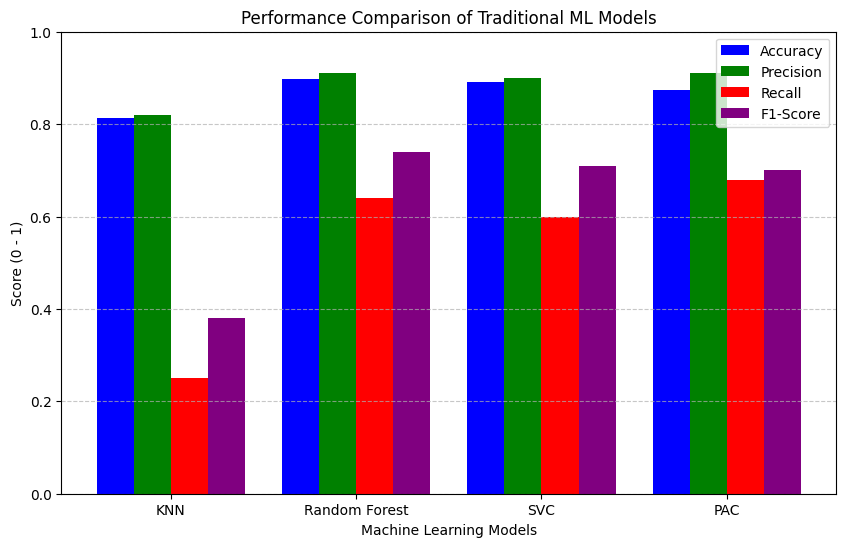

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["KNN", "Random Forest", "SVC", "PAC"]

# Performance metrics
accuracy = [0.8138, 0.8982, 0.8903, 0.8740]
precision = [0.82, 0.91, 0.90, 0.91]
recall = [0.25, 0.64, 0.60, 0.68]
f1_score = [0.38, 0.74, 0.71, 0.70]

# X-axis positions
x = np.arange(len(models))
width = 0.2

# Plot bars
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5*width, accuracy, width, label="Accuracy", color="blue")
plt.bar(x - 0.5*width, precision, width, label="Precision", color="green")
plt.bar(x + 0.5*width, recall, width, label="Recall", color="red")
plt.bar(x + 1.5*width, f1_score, width, label="F1-Score", color="purple")

# Labels and limits
plt.xlabel("Machine Learning Models")
plt.ylabel("Score (0 - 1)")
plt.title("Performance Comparison of Traditional ML Models")
plt.xticks(ticks=x, labels=models)
plt.ylim(0, 1)  # Ensuring the y-axis is between 0 and 1
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


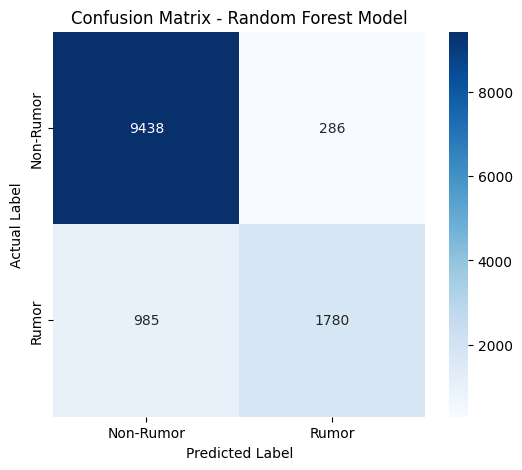

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix for Random Forest
cm_rf = np.array([[9307  417]
 [ 534 2231]])

# Class labels
labels = ["Non-Rumor", "Rumor"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest Model")

# Show plot
plt.show()
